In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path = Path("../ML Engineer/train.csv")
test_path = Path("../ML Engineer/test.csv")
submission_path = Path("../ML Engineer/sample_submission.csv")

In [4]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
submission_data = pd.read_csv(submission_path)

In [5]:
train_data.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam


In [8]:
test_data.head()

,id_,source,email
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,5,Subject: get me thru july newsletter\nthe get ...
1,cbe49c1c-b328-4716-9b78-9169c6111e80,4,Subject: looking for a good match to take out ...
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,4,"Subject: fw : besides our special pricing , yo..."
3,b696569e-f7de-4771-9946-be5dd477b2f6,5,Subject: access to mary solmonson ' s e - mail...
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,2,Subject: software should be easy to use !\nsev...


In [9]:
submission_data.head()

,id_,class
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,not_spam
1,cbe49c1c-b328-4716-9b78-9169c6111e80,not_spam
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,not_spam
3,b696569e-f7de-4771-9946-be5dd477b2f6,not_spam
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,not_spam


## Explaratory Data Analysis

In [11]:
print(f"Train data shape: {train_data.shape}\n"\
      f"Test data shape: {test_data.shape}\n"\
      f"submission data shape: {submission_data.shape}")

Train data shape: (15000, 4)
Test data shape: (13544, 3)
submission data shape: (13544, 2)


In [12]:
train_data.isnull().sum()

id_       0
source    0
email     0
class     0
dtype: int64

In [13]:
test_data.isnull().sum()

id_       0
source    0
email     0
dtype: int64

In [14]:
submission_data.isnull().sum()

id_      0
class    0
dtype: int64

In [15]:
train_data.columns

Index(['id_', 'source', 'email', 'class'], dtype='object')

In [18]:
train_data.source.unique(), test_data.source.unique()

(array([2, 4, 6, 5, 3]), array([5, 4, 2, 6, 3]))

In [26]:
train_data['class'].value_counts()

class
spam        8254
not_spam    6746
Name: count, dtype: int64

C:\Users\abdullah\AppData\Local\Temp\ipykernel_7700\142910785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=train_data, palette='coolwarm')


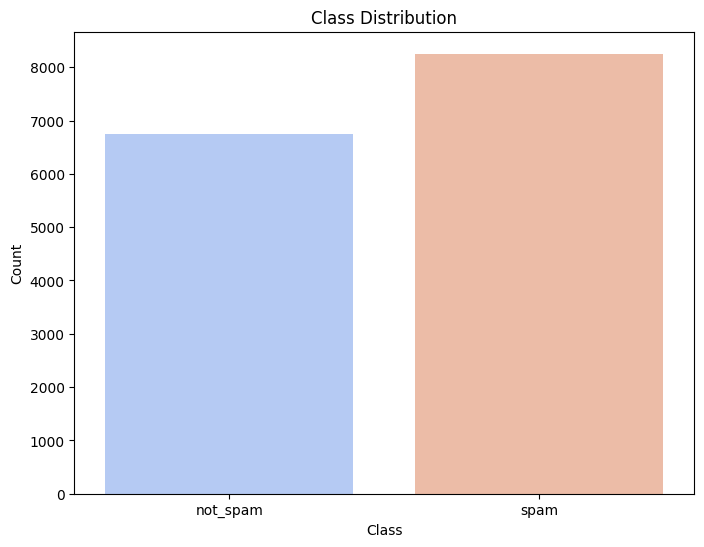

In [23]:
# Assuming there's a 'label' column for classification
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=train_data, palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [28]:
len(train_data.email[0])

2186

In [8]:
import nltk

train_data['email'] = train_data['email'].str.lower()
train_data.dropna(subset=['email'], inplace=True)
train_data['email'] = train_data['email'].str.replace(r'[^\w\s]', '', regex=True)
train_data['email'] = train_data['email'].str.strip()
train_data['email'] = train_data['email'].str.replace(r'\s+', ' ', regex=True)

train_data.email[0]

'subject is the supply rebound beginning an update on cera s outlook for us gas productive capacity cera conference call notification title is the supply rebound beginning an update on cera s outlook for us gas productive capacity url http www 20 cera com eprofile u 35 netscape navigator 3 02 or higher or sun hot java tm close all desktop applications and disable your screen saver to ensure computer compatibility complete the internet instructions before the day of the call a message will appear telling you that your meeting is not ready to start however it also informs you about any action that you may need to take to prepare your computer to participate technical assistance if you experience difficulties during the call you may signal for technical assistance by pressing 0 star zero on your telephone keypad once connected to the audio portion of the conference for more information please contact katya ashe via e mail at kashe cera com or via telephone at 617 441 2659 a recording of t

In [9]:
import spacy
 
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def remove_stopwords(text):
    doc = nlp(text)
    # Remove stopwords
    filtered_words = [token.text for token in doc if not token.is_stop]
    # Join the filtered words to form a clean text
    clean_text = ' '.join(filtered_words)
    return clean_text

remove_stopwords(train_data.email[0])

'subject supply rebound beginning update cera s outlook gas productive capacity cera conference notification title supply rebound beginning update cera s outlook gas productive capacity url http www 20 cera com eprofile u 35 netscape navigator 3 02 higher sun hot java tm close desktop applications disable screen saver ensure computer compatibility complete internet instructions day message appear telling meeting ready start informs action need prepare computer participate technical assistance experience difficulties signal technical assistance pressing 0 star zero telephone keypad connected audio portion conference information contact katya ashe e mail kashe cera com telephone 617 441 2659 recording available 10 2001 access recording 1 888 203 1112 united states 1 719 457 0820 outside united states use confirmation number 574828 access end e mail category conference notification cera knowledge area s north american gas cera s spring 2001 roundtable event dates agendas available http ww

In [25]:
train_data['email'] = train_data['email'].apply(remove_stopwords)

In [26]:
train_data['text_length'] = train_data['email'].apply(len)
train_data.head()

,id_,source,email,class,text_length
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject supply rebound beginning update cera s...,not_spam,1447
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list 100 million addresses 79 ja...,spam,2722
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicide ready lomse ...,spam,6652
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project wanted share great news...,not_spam,1913
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin online fda pharmacy hydr...,spam,132


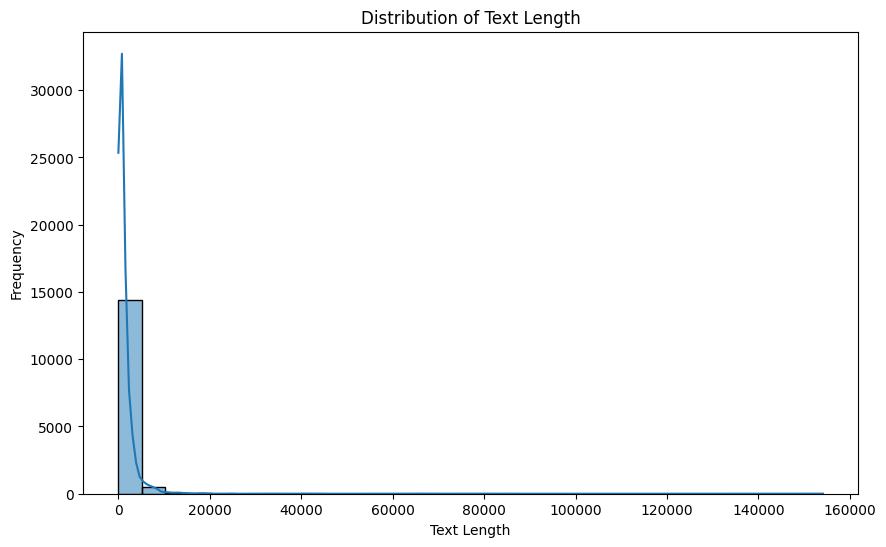

In [17]:
# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [13]:
train_data[train_data['text_length'] ==train_data['text_length'].min()]

,id_,source,email,class,text_length
290,8a53d2cb-fda6-4d89-858f-d20e70fdcd44,4,subject,spam,7
497,187b3bc1-f3ed-4a28-ab98-412224990a22,4,subject,spam,7
1838,24a8cfd4-1428-4043-b331-0e3f8dbaf7ef,4,subject,spam,7
2568,6b57a330-653a-4901-9cdd-b91f2a7732da,4,subject,spam,7
5856,b0c4c432-13f4-43a0-81cc-d3b0f09e29ef,4,subject,spam,7
6092,ddaa3b2f-a9cf-4ce3-9e52-846e792bdc4b,4,subject,spam,7
6631,587341de-ca6c-4bfc-8eb8-829119cb6909,4,subject,spam,7
6857,0986a17b-bab9-44fb-a0c4-0c127e80e1b1,4,subject,spam,7
8328,ab20d797-9e31-4005-abbe-a750c242c228,4,subject,spam,7
9596,089f213c-e5dd-43e7-b75e-a260fc706438,4,subject,spam,7


In [18]:
train_data[train_data['text_length'] ==train_data['text_length'].max()]

,id_,source,email,class,text_length
11630,a2e0bbc0-c562-4be0-9fcc-d533d3d0f6e0,3,subject enron mentions fall of a power giant b...,not_spam,154122


In [20]:
train_data['text_length'].describe()

count     15000.000000
mean       1444.161467
std        3906.565129
min           7.000000
25%         333.750000
50%         688.500000
75%        1460.500000
max      154122.000000
Name: text_length, dtype: float64

In [21]:
test_data['text_length'].describe()

count     13544.000000
mean       1626.857649
std        5000.202525
min          10.000000
25%         376.000000
50%         747.000000
75%        1641.000000
max      228377.000000
Name: text_length, dtype: float64

In [16]:
test_data['text_length'] = test_data['email'].apply(len)
print(test_data.text_length.min())
test_data[test_data['text_length'] ==test_data['text_length'].min()]

10


,id_,source,email,text_length
1098,5586e416-e43b-44ec-acb1-7d8d72e99c70,4,Subject: \n,10
2434,347b37b6-fd93-4668-8655-48a6f200b90d,4,Subject: \n,10
2502,b48c25a3-97f1-46ee-8f0f-7a464966b049,4,Subject: \n,10
3674,012a9c05-b839-489d-82d5-4280da746ea3,4,Subject: \n,10
4053,872fccf9-c15b-4e41-a8cf-05d2c309f7b1,4,Subject: \n,10
4207,4a4a93fa-ffce-46c4-8ffe-3d8b231a78c3,4,Subject: \n,10
4259,2802d989-d7f8-4b7b-b72d-8e0447150961,4,Subject: \n,10
4527,cb928b04-29b3-460e-9c11-5025964e4491,4,Subject: \n,10
6257,cd59b941-613a-4b33-bb67-828535554e99,4,Subject: \n,10
8260,12ff35c2-fcba-4f5d-aa67-99b7dc692826,4,Subject: \n,10


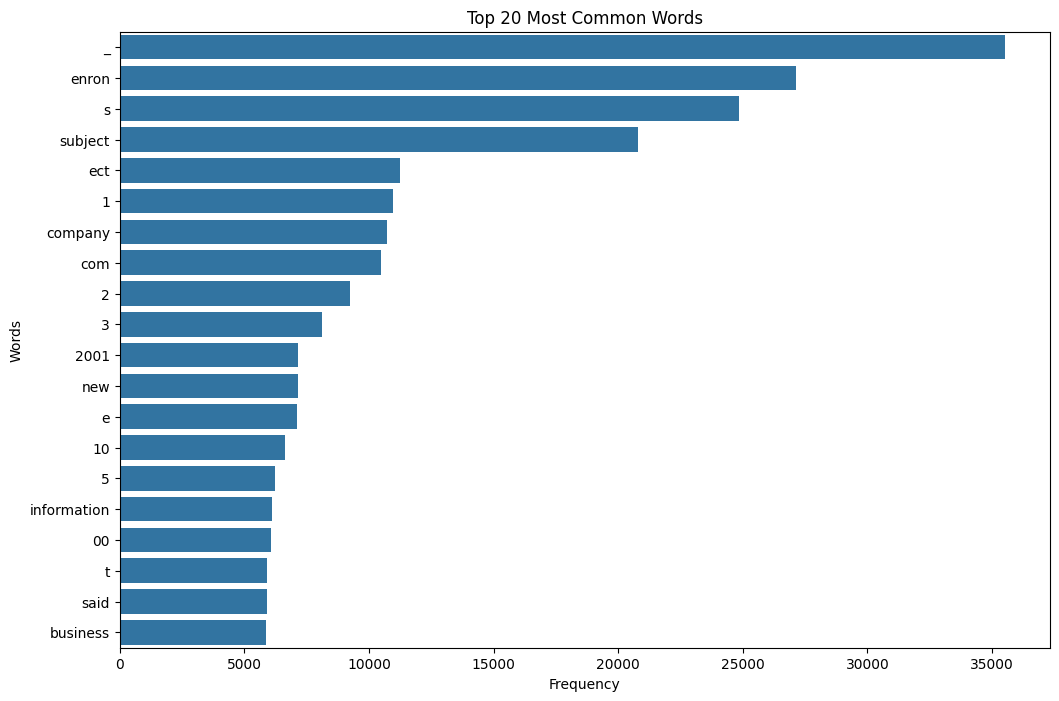

In [27]:
from collections import Counter

# Tokenize the cleaned text
all_words = [word for tokens in train_data['email'].str.split() for word in tokens]
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [24]:
train_data['email'][0]

'subject is the supply rebound beginning an update on cera s outlook for us gas productive capacity cera conference call notification title is the supply rebound beginning an update on cera s outlook for us gas productive capacity url http www 20 cera com eprofile u 35 netscape navigator 3 02 or higher or sun hot java tm close all desktop applications and disable your screen saver to ensure computer compatibility complete the internet instructions before the day of the call a message will appear telling you that your meeting is not ready to start however it also informs you about any action that you may need to take to prepare your computer to participate technical assistance if you experience difficulties during the call you may signal for technical assistance by pressing 0 star zero on your telephone keypad once connected to the audio portion of the conference for more information please contact katya ashe via e mail at kashe cera com or via telephone at 617 441 2659 a recording of t

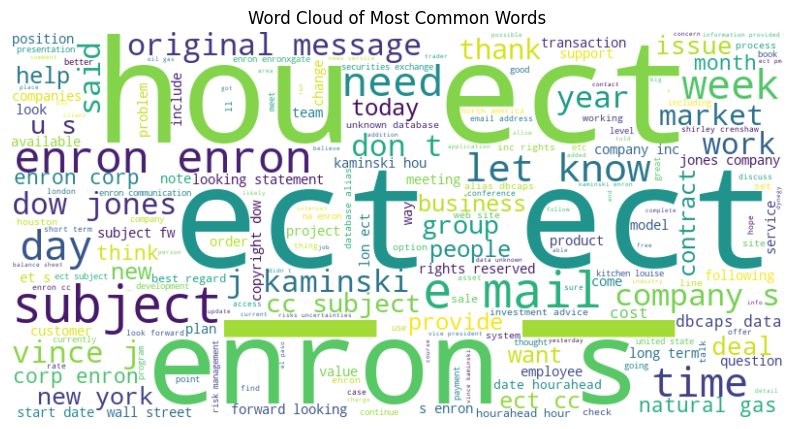

In [28]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

In [29]:
spam = train_data[train_data['class']=='spam']
not_spam = train_data[train_data['class']=='not_spam']

spam_all_words = [word for tokens in spam['email'].str.split() for word in tokens]
not_spam_all_words = [word for tokens in not_spam['email'].str.split() for word in tokens]

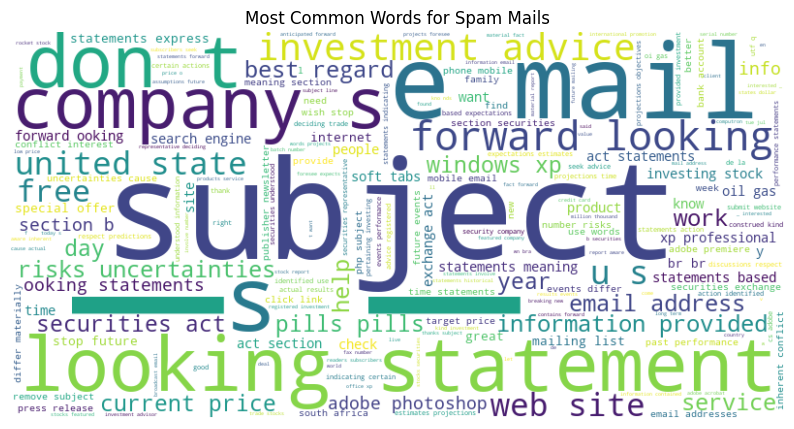

In [33]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_all_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words for Spam Mails')
plt.show()

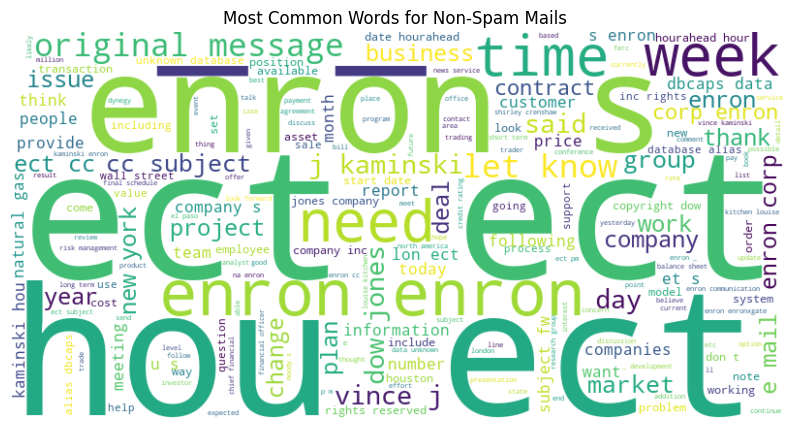

In [32]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(not_spam_all_words))

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words for Non-Spam Mails ')
plt.show()

TfidfVectorizer
Chi2, correlation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.naive_bayes import MultinomialNB

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

In [ ]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

In [ ]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

chi square test

model.fit(features, labels)

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

# Create our list of punctuation marks
punctuations = string.punctuation

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

stemming, lemmatization

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))



from gensim.parsing.preprocessing import remove_stopwords
 
# Another sample text
new_text = "The majestic mountains provide a breathtaking view."
 
# Remove stopwords using Gensim
new_filtered_text = remove_stopwords(new_text)
 
print("Original Text:", new_text)
print("Text after Stopword Removal:", new_filtered_text)

In [ ]:
# WORD-COUNT
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['target']==1]['word_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==0]['word_count'].mean()) #Non-Disaster tweets

In [ ]:
#for word embedding
import gensim
from gensim.models import Word2Vec

# PLOTTING WORD-COUNT
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=df_train[df_train['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

In [ ]:
# CHARACTER-COUNT
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
print(df_train[df_train['target']==1]['char_count'].mean()) #Disaster tweets
print(df_train[df_train['target']==0]['char_count'].mean()) #Non-Disaster tweets

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [ ]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
from nltk.corpus import stopwords
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_train['clean_text'] = df_train['text'].apply(lambda x: finalpreprocess(x))
df_train.head()

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"],df_train["target"],test_size=0.2,shuffle=True)
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [ ]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)
#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
def fit(self, X, y):
        return self
def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
w2v = dict(zip(model.wv.index2word, model.wv.syn0)) df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']]
model = Word2Vec(df['clean_text_tok'],min_count=1)     
modelw = MeanEmbeddingVectorizer(w2v)
# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_test_tok)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

Bag-of-Words (with Tf-Idf) and Word Embedding with Word2Vec. You can further enhance the performance of your model using this code by

using other classification algorithms like Support Vector Machines (SVM), XgBoost, Ensemble models, Neural networks etc.
using Gridsearch to tune the hyperparameters of your model
using advanced word-embedding methods like GloVe and BERT